## Tutorial for getting started with EEG data

### 1. Import EEG data into python

This tutorial walks through some basic commands for analyzing EEG data with python & MNE

In [1]:
import mne 

In [2]:
# Folder & files containing the data:
data_path = '/Users/athina/Documents/Bremen2018/PracticalPrep/'
data_file = '817_1_PDDys_ODDBALL_Clean_curated'

filename = data_path + data_file

# We read the EEG epochs:
epochs = mne.read_epochs(filename + '.fif')

This filename (/Users/athina/Documents/Bremen2018/PracticalPrep/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
Reading /Users/athina/Documents/Bremen2018/PracticalPrep/817_1_PDDys_ODDBALL_Clean_curated.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied


<ipython-input-2-71e884f6d195>:8: RuntimeWarning: This filename (/Users/athina/Documents/Bremen2018/PracticalPrep/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(filename + '.fif')


189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


The epoch files contain informatin about the recording, experimental conditions, channels, and finally the data. General infomation on the data can be accessed via the following command. Which fields do you recognize?

In [4]:
epochs.info['ch_names']

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'CPz']

The EEG data are now organized in epochs, and they can be accessed via:

In [ ]:
# The data can be accessed via:
epochs._data

Data are stored as a 3-D matrix, containing: [number_epochs, number_electrodes, number of time-points]. You can double-check the number of each element by using the command .shape : 

In [ ]:
data = epochs._data
print("Found " + str(data.shape[0]) + " epochs..." )
print("over " + str(data.shape[1]) + " electrodes..." )
print("for " + str(data.shape[2]) + " time-points" )

##### Exercise: Can you plot the first epoch of the first channel across time?

###### Hint: if you're using matplotlib.pyplot remember %matplotlib tk

In [ ]:
import matplotlib.pyplot as plt

%matplotlib tk
plt.plot(data[0,0,:])
plt.show()

Another useful feature is knowing which condition do our epochs belong to. You can retrieve this information by using 'epochs.events':

In [ ]:
events = epochs.events[:,2]

The first column on epochs.events is the time when an epoch occured in the recording, and the third the event code. The labels of each event code can be accessed with:

In [ ]:
epochs.event_id

##### Exercise: can you find how many epochs are there for each condition?

In [ ]:
import numpy as np
np.where(events == 202)[0][0]

##### Exercise: Going back to the plots, can you now plot the first epoch of the Standard condition?


In [ ]:

plt.plot(data[159,0,:])
plt.show()

### 2. Using MNE functions

MNE has several build-in functions to give similar plots and to process the data. For example, the following cell selects all the epochs of the 'Standard' condition and plots their mean:

In [ ]:
# Select all the standard epochs, in a dictionary-like way:
St_epochs = epochs['Standard']

# Average them:
St_mean = St_epochs.average()
%matplotlib tk
# Plot their mean:
St_mean.plot()

###### Exercise: can you now plot the means of all epoch types?

In [ ]:
All_epochs = epochs
All_epochs_mean = All_epochs.average()
All_epochs_mean.plot()

### 3. Preprocessing

There are several options for processing epoched data with MNE. You may have noticed that the data in the plots above were quite noisy. One way to remove noise is to filter the data and apply baseline correction:

Setting up band-pass filter from 0.1 - 20 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-4-d232909aa9d5>:5: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(l_freq = 0.1, h_freq = 20)


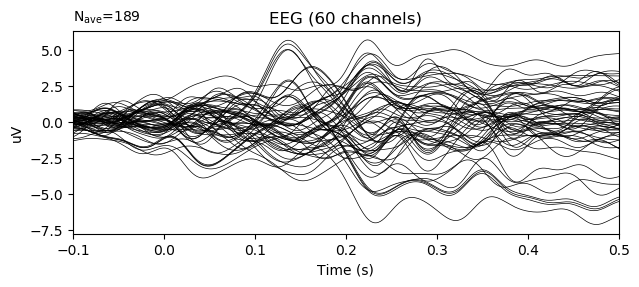

In [4]:
# filter the epoched data:

%matplotlib tk

epochs.filter(l_freq = 0.1, h_freq = 20)
epochs.average().plot()

##### Exercise: try changing the filter settings. What happens?
Keep in mind that when filtering the data with 'epochs.filter', the original data will be altered. You need to make a copy or reload the data to use different filter settings now

In [ ]:
epochs.filter(l_freq = 30, h_freq = 80)
epochs.average().plot()

Now you can apply baseline correction and replot the data. What happens?

Applying baseline correction (mode: mean)


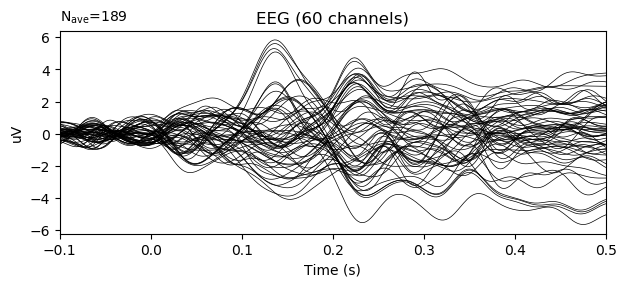

In [5]:
# Apply baseline correction:
epochs.apply_baseline((None, 0))
epochs.average().plot()

Another way to visualize average EEG responses is as an image:

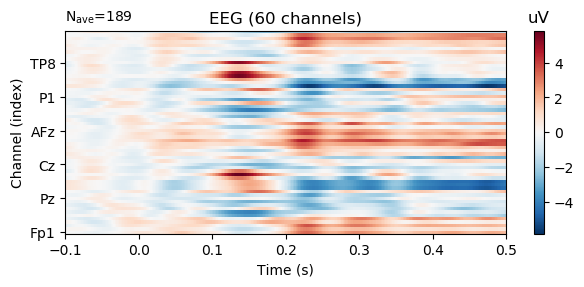

In [6]:
epochs.average().plot_image()

Or, as scalp topographies. This can be done as bellow:

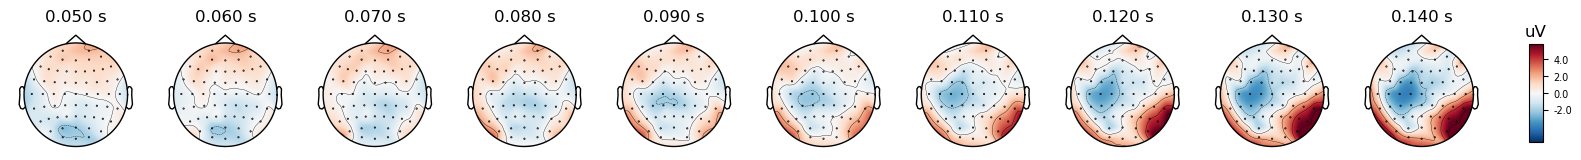

In [9]:
import numpy as np 

# define intervals for which we want to plot topographies:
times = np.arange(0.05, 0.15, 0.01)

epochs.average().plot_topomap(times, ch_type='eeg')

Can you now plot more time-points?

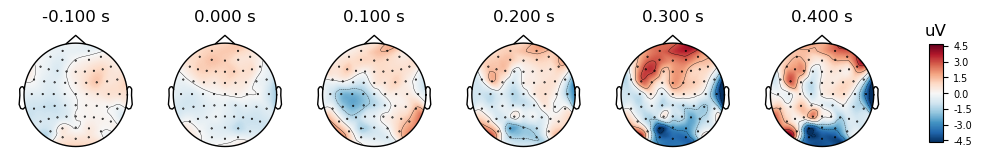

In [10]:
times = np.arange(-0.1, 0.5, 0.1)

epochs['Standard'].average().plot_topomap(times, ch_type='eeg')

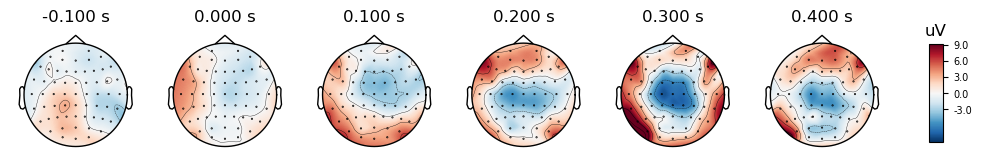

In [12]:
times = np.arange(-0.1, 0.5, 0.1)

epochs['Target'].average().plot_topomap(times, ch_type='eeg')

Epoch data can be saved. All preprocessing steps that have been applied on the data are saved as well (filters/baseline correction)

In [ ]:
epochs.save(filename+"_preproc.fif") 